In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [4]:
df = pd.read_csv("medical_insurance_dataset.csv")

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

In [5]:
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


Note that there are currently no headers in the CSV file.

<h3>Data Preprocessing</h3>

In [6]:
 headers = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges']
df.columns = headers

In [7]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


There is no na values in dataset

In [8]:
# Check for '?' 
contain_question_marks = (df == "?").any().any() #Checks if any True value exists in the entire DataFrame.
contain_question_marks

np.True_

In [9]:
df = df.replace('?', np.nan)
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [11]:
df.isna().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

We can see age has 4 and smoker as 7 na values

In [12]:
# for continuous attribute age replace with mean 
mean_age = df['age'].astype("float").mean()
df['age'] = df['age'].replace(np.nan, mean_age)

In [13]:
# for categorical attribute  smoker replace with mode of column
mode_smoker = df['smoker'].value_counts().idxmax()
mode_smoker

'0'

In [14]:
df['smoker'] = df['smoker'].replace(np.nan, mode_smoker)

In [15]:
df.isna().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

In [16]:
# Updating datatypes of age and smoker
df[['age', 'smoker']] = df[['age', 'smoker']].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int64  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [18]:
# charges column has values which are more than 2 decimal places long, rounded to 2 decimal places
df['charges'] = np.round(df['charges'],2)
df['charges'].head(5)

0     1725.55
1     4449.46
2    21984.47
3     3866.86
4     3756.62
Name: charges, dtype: float64

<h3>Exploratory Data Analysis (EDA)</h3>

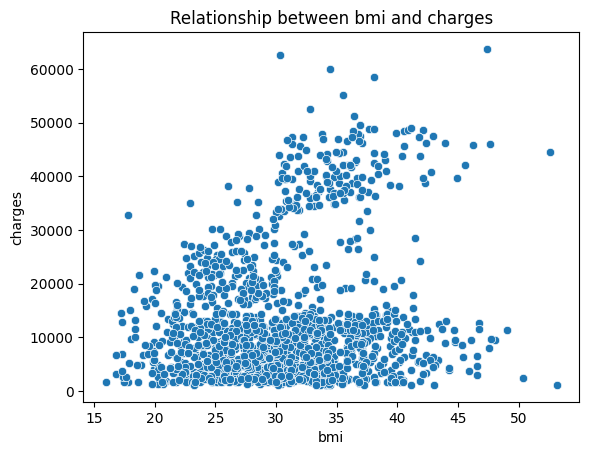

In [19]:
sns.scatterplot(x = df['bmi'], y = df['charges'])
plt.title("Relationship between bmi and charges")
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

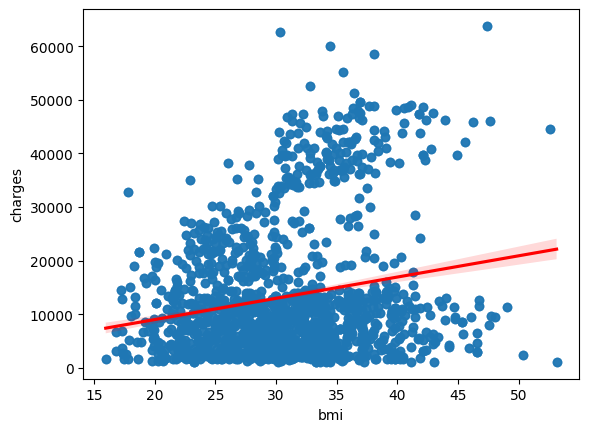

In [20]:
sns.regplot(x='bmi', y = "charges", data = df, line_kws={"color": "red"})

In [21]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


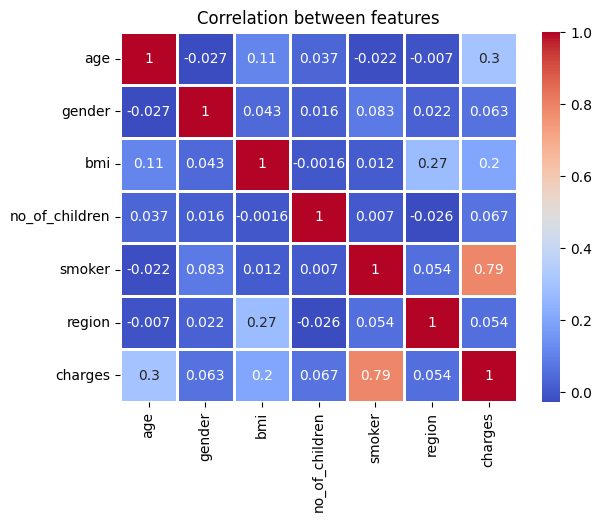

In [22]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=1)
plt.title("Correlation between features")
plt.show()

<Axes: xlabel='age', ylabel='charges'>

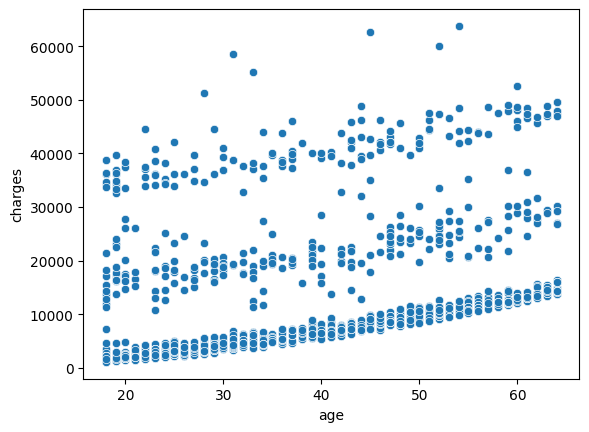

In [23]:
sns.scatterplot(x=df['age'], y=df['charges'])

<h3>Model Development</h3>

Fit a linear regression model that may be used to predict the charges value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.

In [27]:
x = df[['smoker']]
y = df[['charges']]

In [28]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [29]:
print(lm.score(x,y))

0.6227430402464125


In [31]:
z = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(z,y, test_size=0.2, random_state=1)

In [34]:
lm.fit(xtrain, ytrain)
predict = lm.predict(xtest)

In [36]:
print(r2_score(ytest,predict))

0.7254058645347636


In [42]:
cust_data = [[30, 1, 35.00, 2,	0,	4]]
lm.predict(cust_data)

C:\Users\mdjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7289.29578017]])